In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
target=df.Survived
target.isna().any()

False

In [5]:
x=df[["Pclass","Sex","Age","Fare"]]
x.Age=x.Age.interpolate()

C:\Users\PC\AppData\Local\Temp\ipykernel_8424\4019905991.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.Age=x.Age.interpolate()


In [6]:
x.Age.isna().any()

False

In [7]:
dummy=pd.get_dummies(df.Sex)
dummy

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [8]:
x=pd.concat([x,dummy],axis=1)

In [9]:
input_=x.drop("Sex",axis=1)


In [10]:
input_

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1
...,...,...,...,...,...
886,2,27.0,13.0000,0,1
887,1,19.0,30.0000,1,0
888,3,22.5,23.4500,1,0
889,1,26.0,30.0000,0,1


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_,target,test_size=0.3)

In [12]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()


In [13]:
model.fit(X_train,y_train)

GaussianNB()

In [14]:
model.score(X_train,y_train)

0.7800963081861958

In [15]:
model.predict(input_[0:10])

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [16]:
target[0:10]

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64

In [17]:
model.predict_proba(X_test[:10])

array([[9.89615154e-01, 1.03848464e-02],
       [6.96611638e-02, 9.30338836e-01],
       [9.95134108e-07, 9.99999005e-01],
       [6.39073296e-02, 9.36092670e-01],
       [9.89202542e-01, 1.07974582e-02],
       [9.83847324e-01, 1.61526761e-02],
       [7.44259445e-02, 9.25574055e-01],
       [9.73647499e-01, 2.63525012e-02],
       [2.64514232e-02, 9.73548577e-01],
       [3.09745205e-02, 9.69025480e-01]])

### Calculate the score using cross validation

In [18]:
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),X_train, y_train, cv=5)

array([0.784     , 0.76      , 0.776     , 0.7983871 , 0.78225806])

## Spam Detection using Naive Bayes Classifier Algo

In [19]:
df=pd.read_csv("spam.csv")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [20]:
df=df.replace(["ham","spam"],[0,1])

In [21]:
target=df.Category

In [22]:
input_=df.drop("Category",axis=1)
input_

,Message
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will ü b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other s..."
5570,The guy did some bitching but I acted like i'd...


> now most important thing, we've to do is to convert this mail text into numbers for processing.

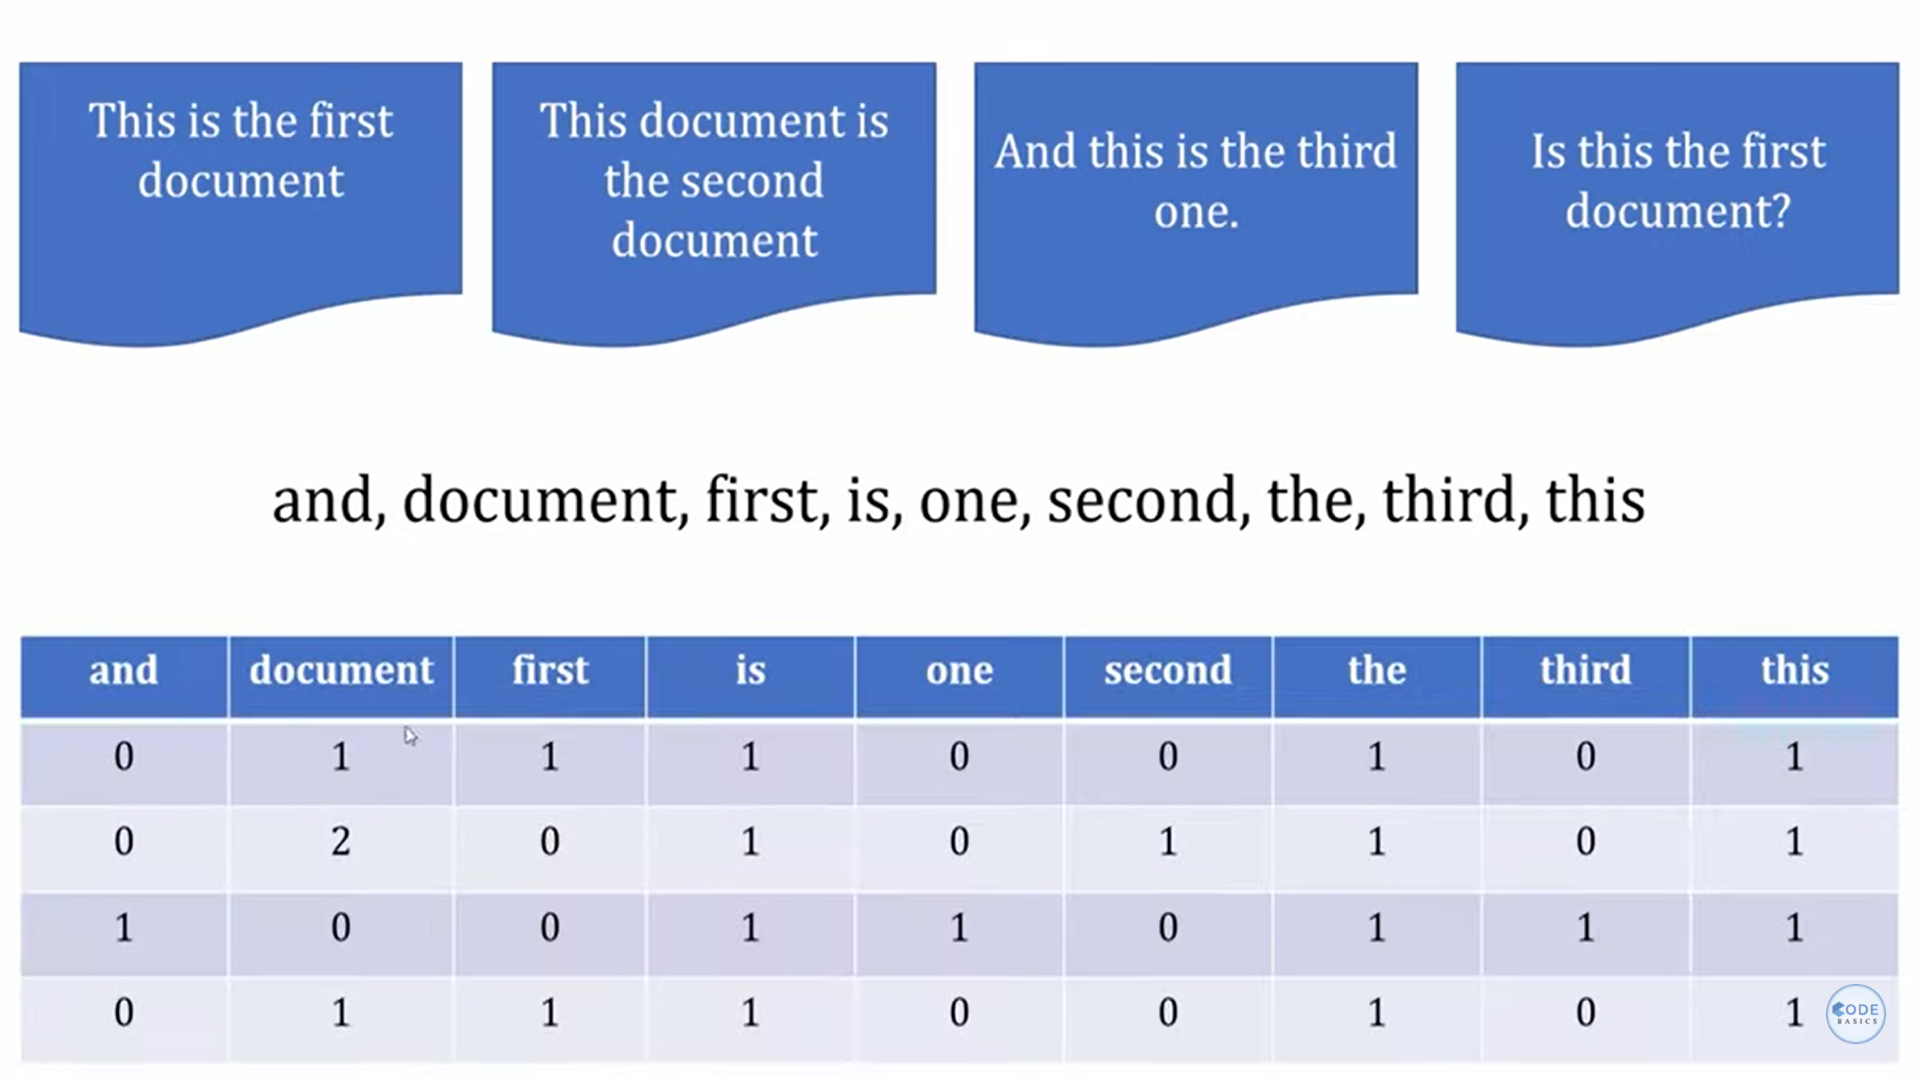

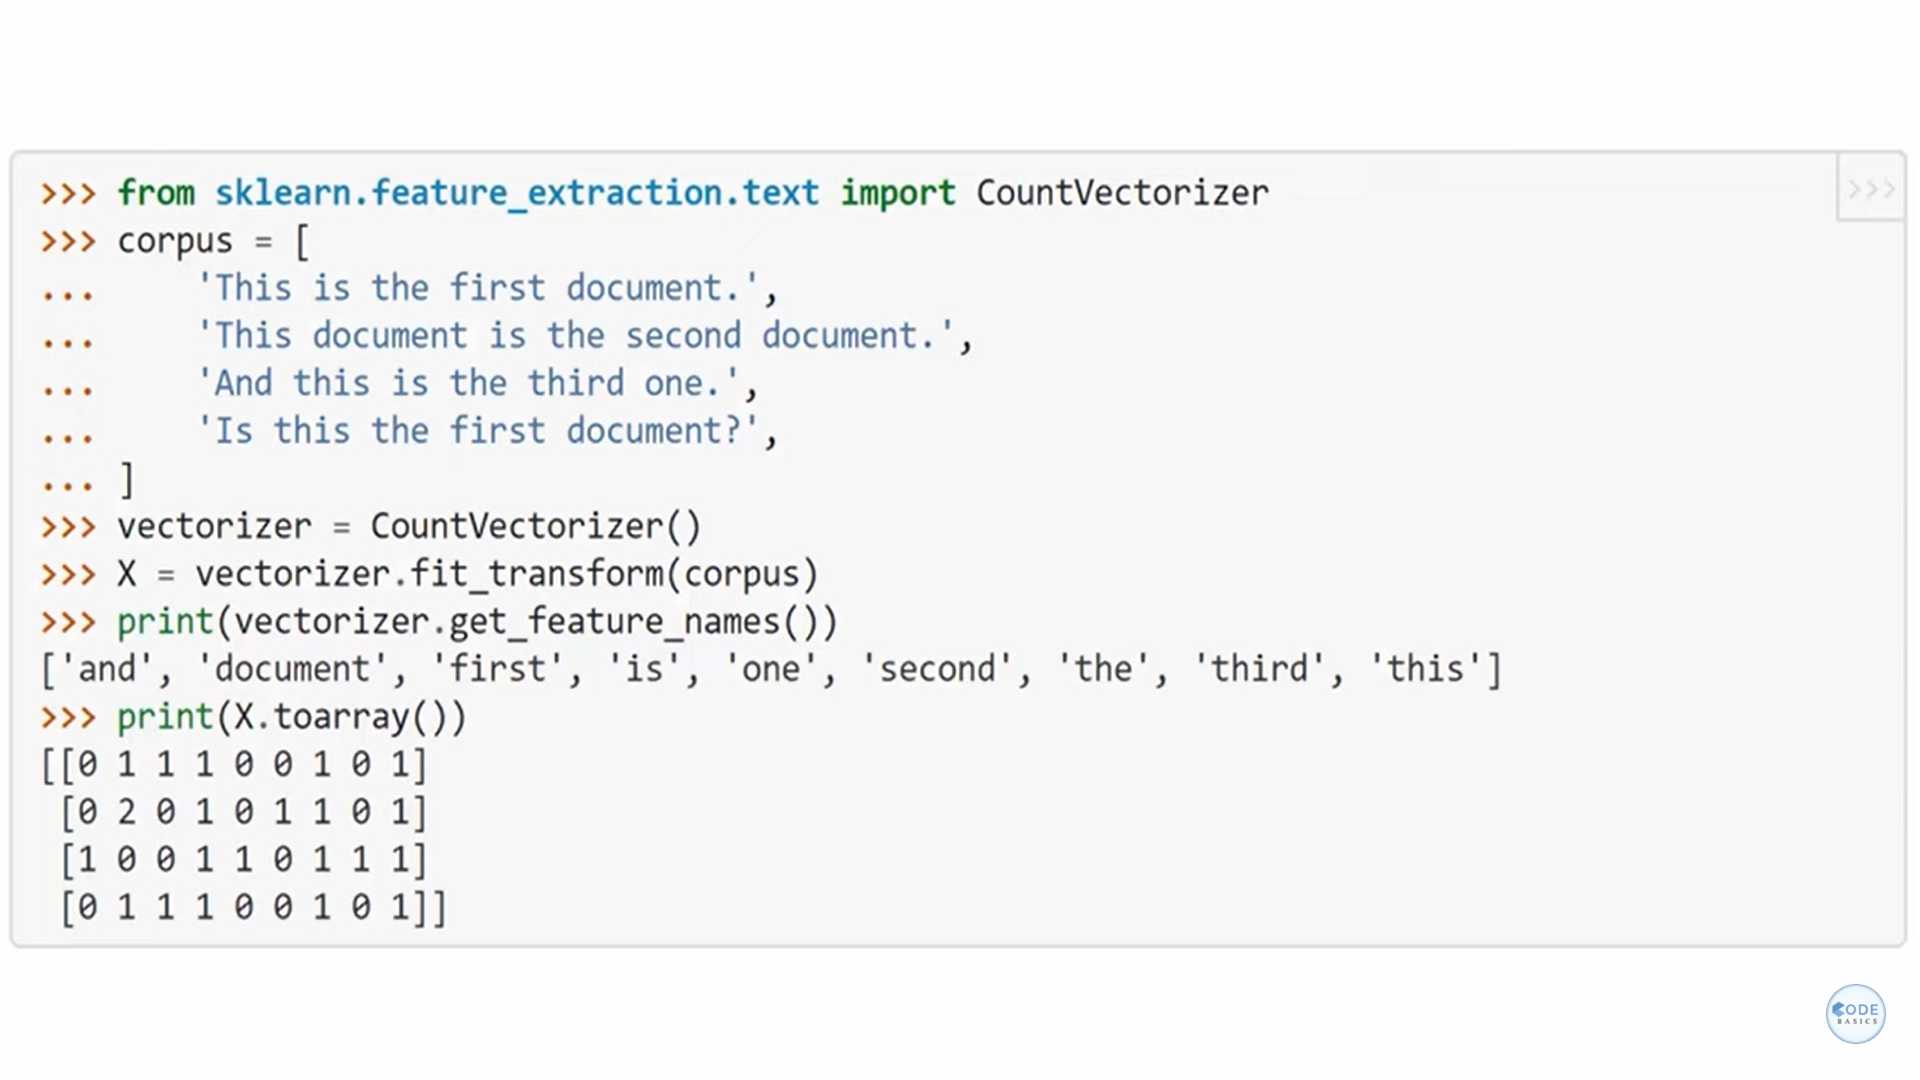

In [91]:
X_train_list=X_train.Message.tolist()
X_train_list_lower=[]
for i in X_train_list:
     X_train_list_lower.append(i.lower())
      

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_,target,test_size=0.3)

In [29]:
#vectorize it
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()

In [92]:
X_train_count = v.fit_transform(X_train_list_lower)
X_train_count

<3900x7243 sparse matrix of type '<class 'numpy.int64'>'
	with 52114 stored elements in Compressed Sparse Row format>

> When to use which Naive Bayes model

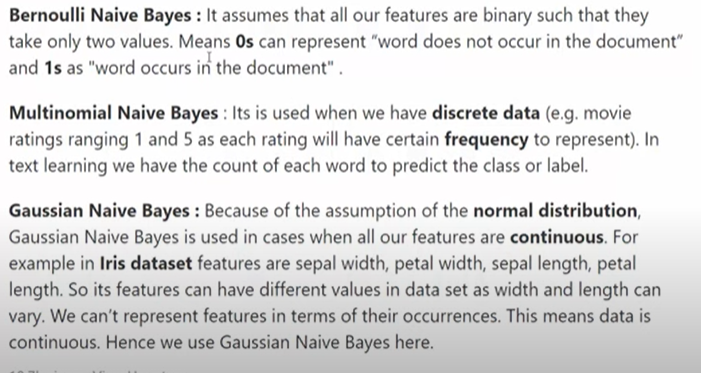

In [93]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [94]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
    ,'Upto 20% discount on parking,to watch footbal game tomorrow?'
]
word_count_matrix=v.transform(emails)
word_count_matrix.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [95]:
model.predict(word_count_matrix)

array([0, 1, 0], dtype=int64)

In [96]:
model.predict_proba(word_count_matrix)

array([[9.99991595e-01, 8.40475575e-06],
       [5.39216563e-02, 9.46078344e-01],
       [8.64055307e-01, 1.35944693e-01]])

In [105]:
X_test=X_test.Message  

*  Always try to pass a series or list to CountVectorizer().transform method

In [108]:
X_test_count = v.transform(X_test)
X_test_count.toarray()


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [110]:
model.predict(X_test_count)
model.score(X_test_count, y_test)

0.9910287081339713

### Sklearn Pipeline

In [111]:
from sklearn.pipeline import Pipeline
#classifier(clf)
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [115]:
clf.fit(X_train_list_lower,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [124]:
clf.predict_proba(['Upto 20% discount on parking'])

array([[0.59704926, 0.40295074]])

In [128]:
clf.score(X_train_list_lower,y_train)

0.8907692307692308

## Naive Bayes: Exercise

Use wine dataset from skiear datasets to classify wines into 3 categories. Load the dataset and spit t nto test and train.
After that train the model using Gaussian and Multinominal classifier and post which model performs better. Use the
trained model to perform some predictions on test data.
